# Lab 7 and 8

Noah Kim Section AC

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import pickle
import math
import scipy 
from scipy import stats
matplotlib.rc('font', size=16)
matplotlib.rc('figure', figsize=(18, 10))

In [4]:
infile1 = open ("higgs_100000_pt_250_500.pkl","rb")
higgs_data = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_250_500.pkl", "rb")
qcd_data = pickle.load(infile2)
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

Putting the Higgs data and QCD background data into dataframes. 

In [5]:
higgs = pd.DataFrame(data = higgs_data, columns = higgs_data.keys())
qcd = pd.DataFrame(data = qcd_data, columns = qcd_data.keys())

## Lab 7 Event Selection Optimization

Make a stacked histogram plot for the feature variable: mass

In [6]:
# Expected yield N_higgs = 100, Expected yields N_qcd = 20000. 100000 data points in data
Expected_prob = stats.poisson.cdf(20100, mu=20000);
Expected_sig = stats.norm.ppf(Expected_prob);
given = 100/math.sqrt(20000);
print('Expected significance without any event selection:', Expected_sig)
print('N_Higgs / Sqrt(N_qcd) :', given)

Expected significance without any event selection: 0.7112259282313185
N_Higgs / Sqrt(N_qcd) : 0.7071067811865475


The N_Higgs/Sqrt(N_qcd) is approximately the same as our calculated expected significance from the Poisson. 

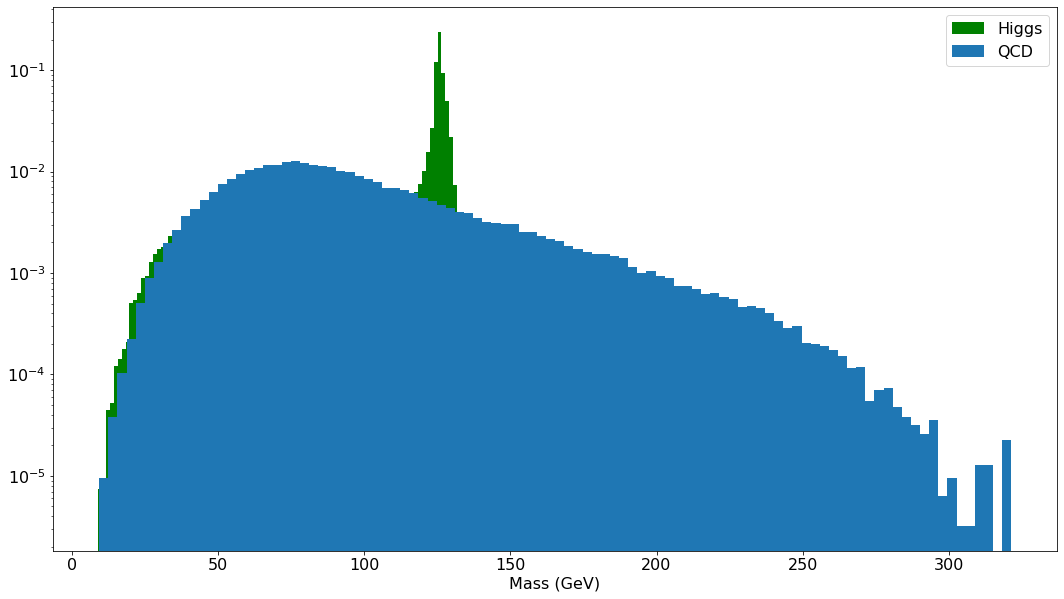

In [7]:
# Stacked Histogram
higgs_mass = higgs['mass'];
qcd_mass = qcd['mass'];
plt.yscale('log');
plt.hist(higgs_mass,bins=100,color='g', label='Higgs', density=True);
plt.hist(qcd_mass,bins=100, label='QCD',density=True);
plt.legend();
plt.xlabel('Mass (GeV)');

## Problem 2

From the histogram plot, I want to make systematic mass cuts using the threshold values of 110 and 140 since that is where the Higgs data is most heavily concentrated. 

In [8]:
# Takes in the lower and upper threshold values and calculates the sigma significance. Returns the significance after the cut. The function itself does not alter the data.
def cutmass (lower,upper):
    qcd_cut = len(qcd_mass[:]) - (len(qcd_mass[lower > qcd_mass]) + len(qcd_mass[qcd_mass > upper]))
    higgs_cut = len(higgs_mass[:]) - (len(higgs_mass[lower > higgs_mass]) + len(higgs_mass[higgs_mass > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

In [9]:
# Finding the best Lower threshold value holding a fixed threshold value of 140.
for i in range(20):
    print([cutmass(111 + i, 140), i + 111])
    

[1.5389982101950594, 111]
[1.569737427111514, 112]
[1.6018335808415753, 113]
[1.6316961013162867, 114]
[1.6660563087131792, 115]
[1.7077434767059019, 116]
[1.7488096549702217, 117]
[1.779477708851014, 118]
[1.8252774421843276, 119]
[1.8625001843558886, 120]
[1.884252428392526, 121]
[1.9215498061534964, 122]
[1.9323875707620133, 123]
[1.9106017969019997, 124]
[1.6885225830354489, 125]
[0.9193686000937213, 126]
[0.5159481080196441, 127]
[0.326624641330091, 128]
[0.18619997871739657, 129]
[0.10272971599706869, 130]


In [10]:
# Finding the best Upper threshold value using the value 122
for i in range(16):
    print([cutmass(122, 140 - i), 140 - i])

[1.9215498061534964, 140]
[1.9589585769916311, 139]
[1.9993327740517923, 138]
[2.051387060214739, 137]
[2.1233258468571714, 136]
[2.181714292665469, 135]
[2.275346989390833, 134]
[2.3491780097499615, 133]
[2.450007416999996, 132]
[2.532190889684072, 131]
[2.6374878758028846, 130]
[2.692156220574669, 129]
[2.6935775970561924, 128]
[2.5939758790792546, 127]
[2.1783055583608584, 126]
[0.9574762989973323, 125]


In [11]:
# Finding the best Upper threshold value using the value 123
for i in range(16):
    print([cutmass(123, 140 - i), 140 - i])

[1.9323875707620133, 140]
[2.0000033912959547, 139]
[2.0448212450963212, 138]
[2.102512689293164, 137]
[2.1529960997958453, 136]
[2.24862385981257, 135]
[2.322351746907904, 134]
[2.4071086051516817, 133]
[2.522432084999965, 132]
[2.6218824793670445, 131]
[2.7516642535732556, 130]
[2.832166976445661, 129]
[2.8645980478035016, 128]
[2.8005927074336725, 127]
[2.396255051671928, 126]
[1.0249290829677475, 125]


In [12]:
# Finding the best Upper threshold value using the value 124
for i in range(16):
    print([cutmass(124, 140 - i), 140 - i])

[1.9106017969019997, 140]
[1.9544954671830965, 139]
[2.030455869913388, 138]
[2.0927281312131085, 137]
[2.148388510132398, 136]
[2.2525175674286517, 135]
[2.3351398285003038, 134]
[2.4313998856088115, 133]
[2.5626779656513894, 132]
[2.6819756747659405, 131]
[2.8415597436728115, 130]
[2.9560007504111825, 129]
[3.0337389952368543, 128]
[3.032183893894291, 127]
[2.680060221998367, 126]
[1.1046188934935768, 125]


After testing values from 122-124 I found that the best upper threshold value resulted in the combination [124, 128]. The maximum significance after the [124, 128] cut was 3.0337. 

## Problem 3

Applying the mass cut to all the values and putting them in their own dataframe.

In [76]:
cut_qcd = (qcd['mass'] > 124) & (qcd['mass'] < 129)
cut_higgs = (higgs['mass'] > 124) & (higgs['mass'] < 129)
higgs_masscut = higgs[cut_higgs]
qcd_masscut = qcd[cut_qcd]

Plotting the histograms for each column with the mass cut and without the mass cut.

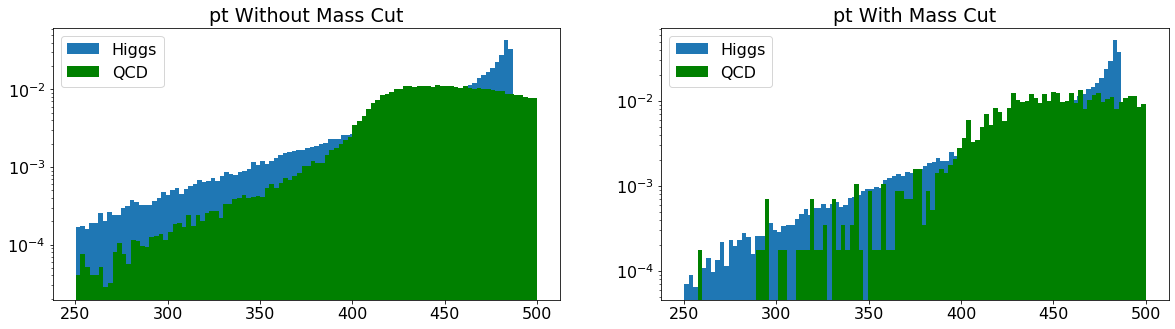

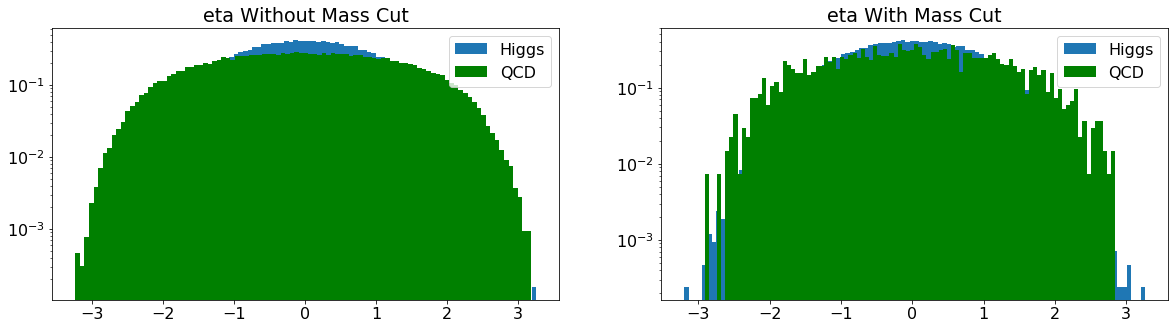

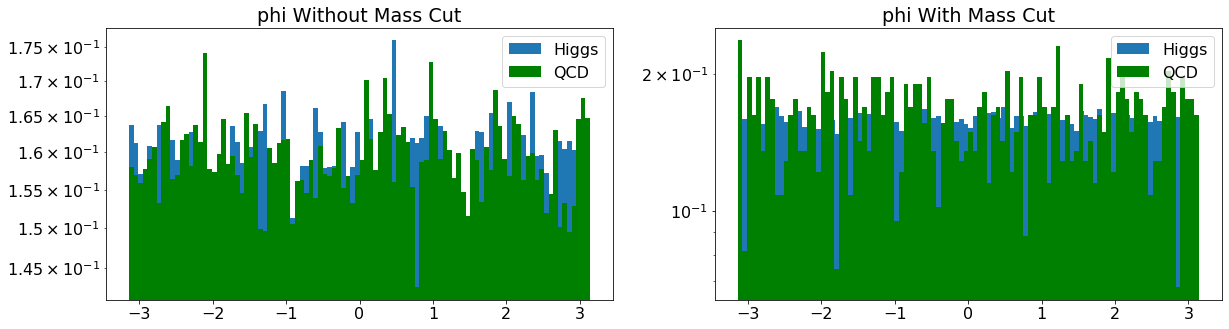

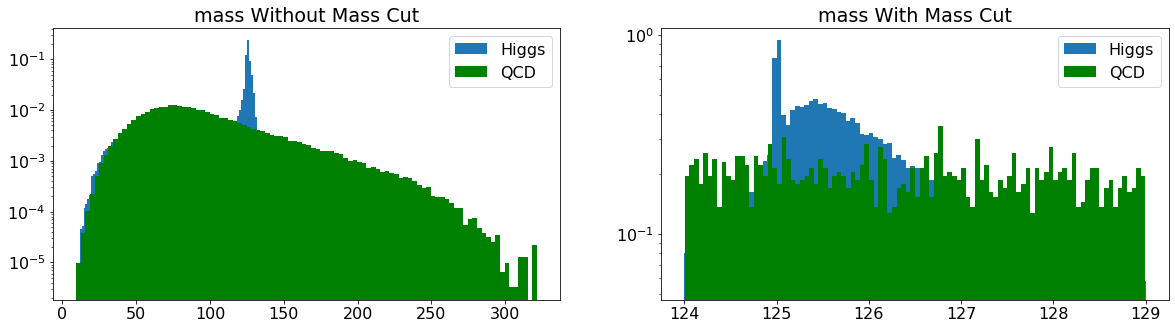

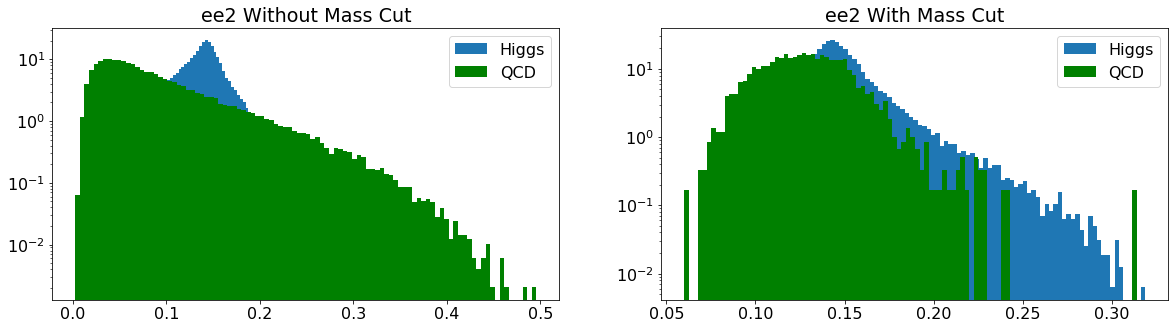

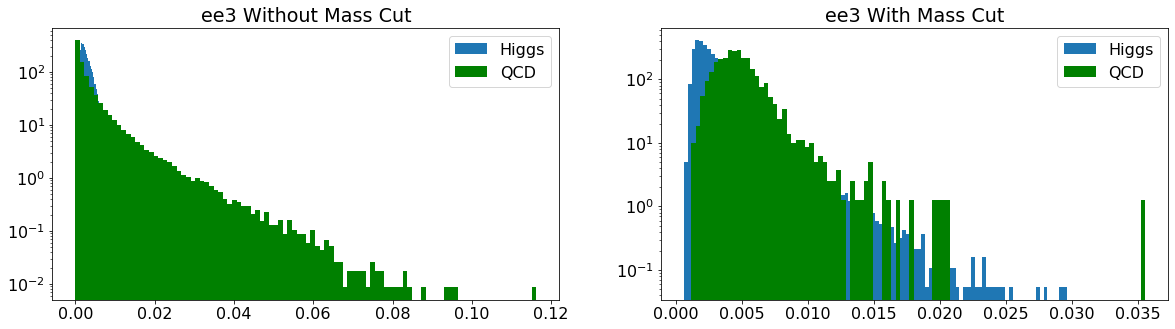

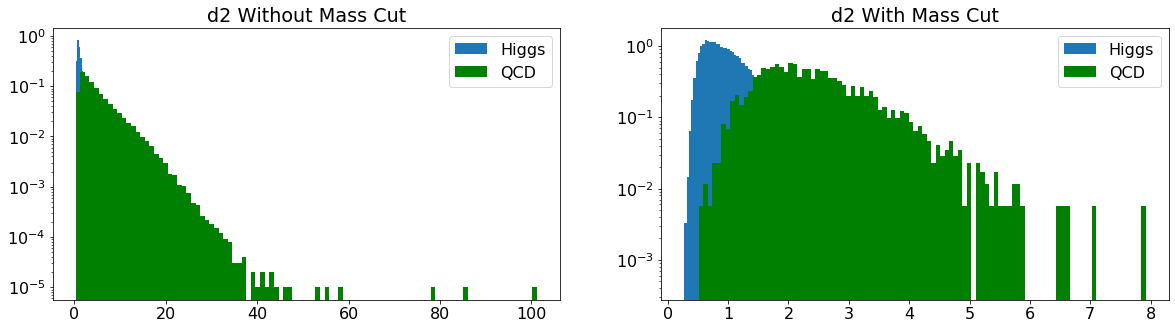

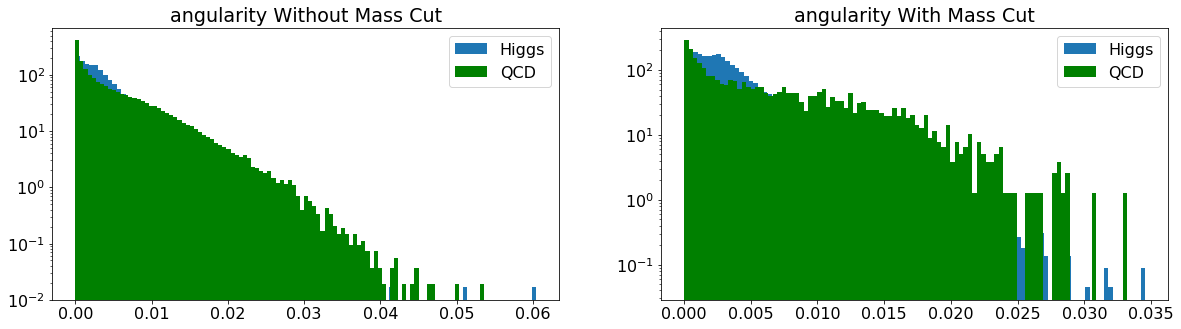

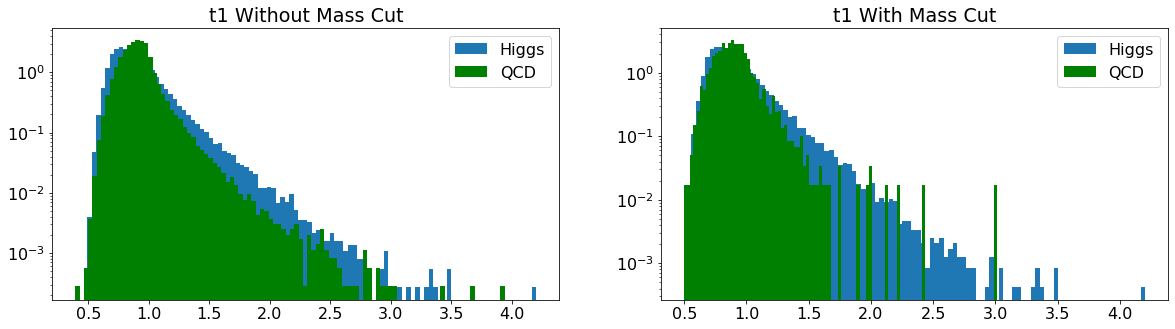

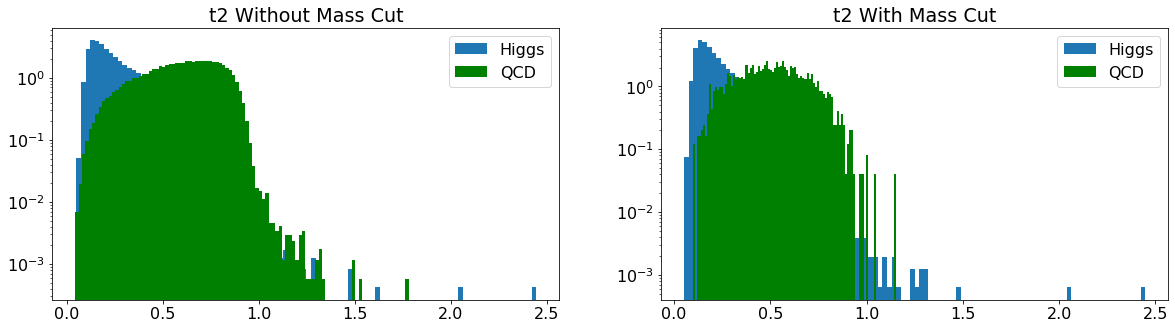

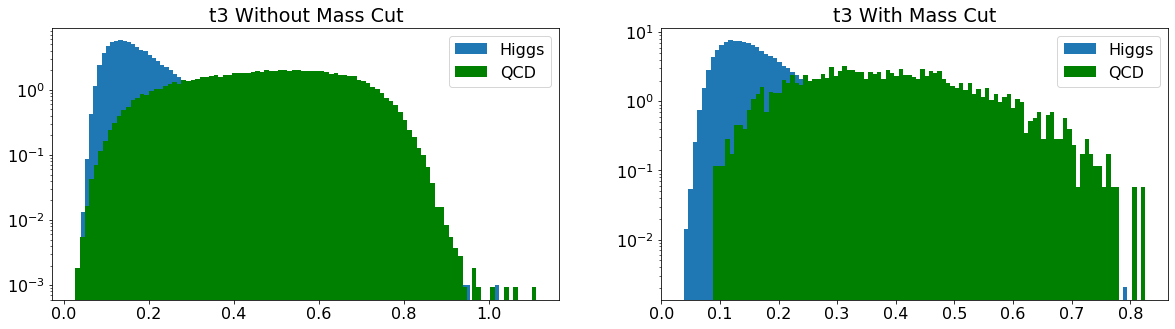

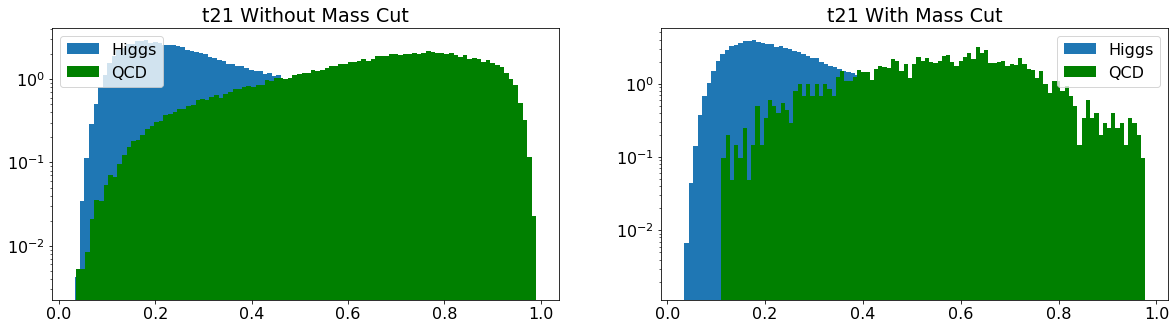

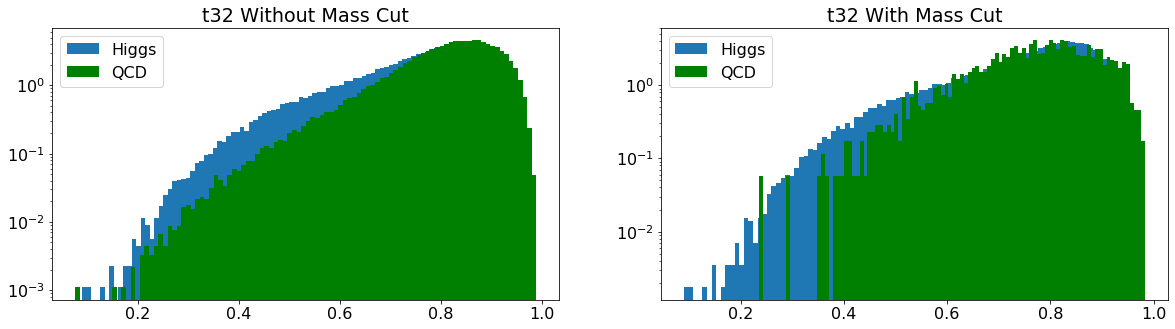

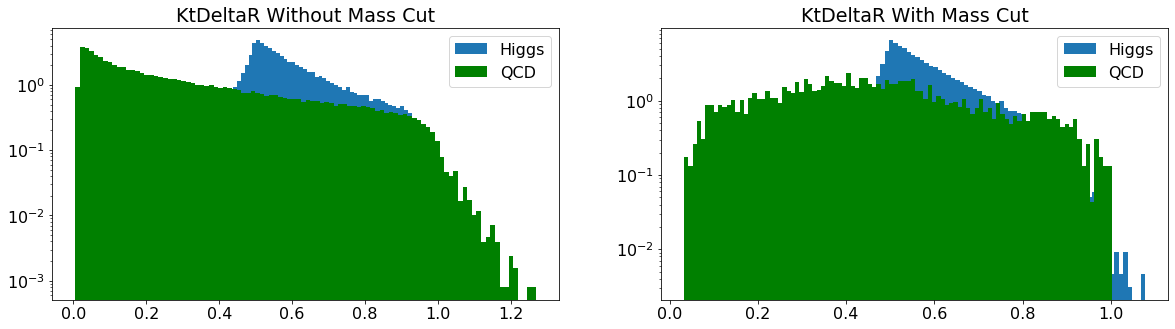

In [14]:
plots = higgs_data.keys()
for i in range(len(plots)):
    fig, (ax) = plt.subplots(1,2,figsize=(20,5))
    name = plots[i]
    ax[0].set_yscale('log');
    ax[1].set_yscale('log');
    ax[0].set_title(name + ' Without Mass Cut')
    ax[0].hist(higgs[name],bins=100,label='Higgs', density=True);
    ax[0].hist(qcd[name],bins=100,label='QCD',density=True, color ='g');
    ax[0].legend();
    ax[1].set_title(name + ' With Mass Cut')
    ax[1].hist(higgs_masscut[name],bins=100,label='Higgs', density=True);
    ax[1].hist(qcd_masscut[name],bins=100,label='QCD',density=True, color ='g');
    ax[1].legend();

Before apply the mass cut, KtDeltaR, t21, t3, t2, ee2 are as discriminative as the mass feature. All these values are offset by a large amount when comparing the Higgs data to the QCD data. However, when looking at it overall, I believe the mass cut is still the best cut to find the significance on because mass has the most distinct Higgs to QCD background ratio. We know where most of the mass is concentrated and it is concentrated at a location where there isn't much QCD relative to Higgs data.

After applying the mass cut, additional features that can improve the expected significance would be t21, t3, t2, KtDeltaR, and d2 because we can see a distinct offset between Higgs and QCD and so these features would have the greatest potential to be features to improve the expected significance after the mass cut. 

## Problem 4

In [15]:
higgs_t21 = higgs_masscut['t21']
qcd_t21 = qcd_masscut['t21']
higgs_t2 = higgs_masscut['t2']
qcd_t2 = qcd_masscut['t2']
higgs_t3 = higgs_masscut['t3']
qcd_t3 = qcd_masscut['t3']
higgs_d2 = higgs_masscut['d2']
qcd_d2 = qcd_masscut['d2']
higgs_ktdeltar = higgs_masscut['KtDeltaR']
qcd_ktdeltar = qcd_masscut['KtDeltaR']

In [16]:
# After initially cutting on Mass I further cut on t21, returns the significance after the cut.
def cutt21 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t21[lower > qcd_t21]) + len(qcd_t21[qcd_t21 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t21[lower > higgs_t21]) + len(higgs_t21[higgs_t21 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on t2, returns the significance after the cut.
def cutt2 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t2[lower > qcd_t2]) + len(qcd_t2[qcd_t2 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t2[lower > higgs_t2]) + len(higgs_t2[higgs_t2 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on t3, returns the significance after the cut.
def cutt3 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_t3[lower > qcd_t3]) + len(qcd_t3[qcd_t3 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_t3[lower > higgs_t3]) + len(higgs_t3[higgs_t3 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

# After initially cutting on Mass I further cut on d2, returns the significance after the cut.
def cutd2 (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_d2[lower > qcd_d2]) + len(qcd_d2[qcd_d2 > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_d2[lower > higgs_d2]) + len(higgs_d2[higgs_d2 > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

def ktdeltar (lower,upper):
    qcd_cut = len(qcd_masscut) - (len(qcd_ktdeltar[lower > qcd_ktdeltar]) + len(qcd_ktdeltar[qcd_ktdeltar > upper]))
    higgs_cut = len(higgs_masscut) - (len(higgs_ktdeltar[lower > higgs_ktdeltar]) + len(higgs_ktdeltar[higgs_ktdeltar > upper]))
    qcd_mu = 20000 * (qcd_cut/len(qcd_mass))
    higgs_mu = 100 * (higgs_cut/len(higgs_mass))
    prob = stats.poisson.cdf(qcd_mu + higgs_mu, qcd_mu)
    sigma = stats.norm.ppf(prob)
    return sigma

In [17]:
# 0 seems like a good threshold for all the values so I will use that as my lower threshold
# Hunting for the best significance using a second cut of t2 using a value of 0.5 as an initial guess
print('t2')
for i in range(15):
    print([cutt2(0, 0.5 - i/30),0.5-i/30])

print()
print('t3')
# Second cut of t3 using a value of 0.4 as initial guess
for i in range(12):
    print([cutt3(0, 0.4 - i/20),0.5-i/20])

print()
print('t21')
#Second cut of t21 using an initial value of 0.6
for i in range(15):
    print([cutt21(0, 0.6 - i/20),0.7-i/20])
    
print()
print('d2')
# Second cut of d2 using an initial value of 2
for i in range(12):
    print([cutd2(0, 2 - i/10),2-i/10])
    
print()
print('KtDeltaR')
# Second cut of d2 using an initial value of 0.45 to 0.8
for i in range(12):
    print([ktdeltar(0.45, 0.8 - i/10),0.8-i/10])

t2
[3.9263435650450593, 0.5]
[4.094257136265045, 0.4666666666666667]
[4.359192259360226, 0.43333333333333335]
[4.585348203186941, 0.4]
[4.952741415711473, 0.3666666666666667]
[5.193579182569888, 0.33333333333333337]
[5.508247753694129, 0.3]
[5.965964726556386, 0.26666666666666666]
[6.33992963558078, 0.23333333333333334]
[6.903815758384916, 0.2]
[7.27745662028784, 0.16666666666666669]
[5.895616393772531, 0.13333333333333336]
[3.0488799516177068, 0.09999999999999998]
[inf, 0.06666666666666665]
[inf, 0.033333333333333326]

t3
[3.8143128095615646, 0.5]
[4.300702014807655, 0.45]
[4.897332217520368, 0.4]
[5.709801015541049, 0.35]
[6.784153882141768, 0.3]
[7.7115025445745395, 0.25]
[5.088426382512204, 0.2]
[inf, 0.15000000000000002]
[inf, 0.09999999999999998]
[inf, 0.04999999999999999]
[inf, 0.0]
[inf, -0.050000000000000044]

t21
[3.8150492023256133, 0.7]
[4.129272939997975, 0.6499999999999999]
[4.474984401568984, 0.6]
[4.913950723744156, 0.5499999999999999]
[5.371741821230716, 0.499999999999

(Not counting inf since that means almost all qcd background so we have no realistic conclusion from it)
Looking at all the values, The highest significance for each is as follows: t2 = 7.28 at interval [0, 0.16], t3 = 7.7 at interval [0, 0.25], t21 = 6.67 at interval [0, 0.3], d2 = 8.1 at interval [0, 1.2], and KtDeltaR = 4 at interval [0.45, 0.8] After applying the second cut using different features. The greatest significance found is from d2. The range mass is [124, 129] and [0, 0.12] for d2. 

Comparing before and after the second cut. I had the greatest significance of 3.03 from the first cut of mass. After the second cut on d2 the significance increased from 3.03 to 8.13. 

Before any featured cuts I had an expected significance of 0.711, with the mass cut I had an expected significance of 3.03 and with the second cut on d2 the significance increased to 9.13.

# Lab 8

In [19]:
higgs_masscut = higgs[cut_higgs]
qcd_masscut = qcd[cut_qcd]

In [20]:
highlumi = pd.read_hdf("data_highLumi_pt_250_500.h5");
lowlumi = pd.read_hdf("data_lowLumi_pt_250_500.h5");\
highL = pd.DataFrame(data = highlumi, columns = highlumi.keys())
lowL = pd.DataFrame(data = lowlumi, columns = lowlumi.keys())

In [33]:
#Creating data frames for mass and d2
mass_high = highL['mass']
mass_low = lowL['mass']
d2_high = highL['d2']
d2_low = lowL['d2']


# Making mass cut using [124,129]
high_cut = (highL['mass'] > 124) & (highL['mass'] < 129)
high_mass = highL[high_cut]
low_cut = (lowL['mass'] > 124) & (lowL['mass'] < 129)
low_mass = lowL[low_cut]

#Taking d2 cut from the mass cut using d2 [0,1.2]
high_d2cutting = (high_mass['d2'] > 0) & (high_mass['d2'] < 1.2)
high_d2 = high_mass[high_d2cutting]
low_d2cutting = (low_mass['d2'] > 0) & (low_mass['d2'] < 1.2)
low_d2 = low_mass[low_d2cutting]

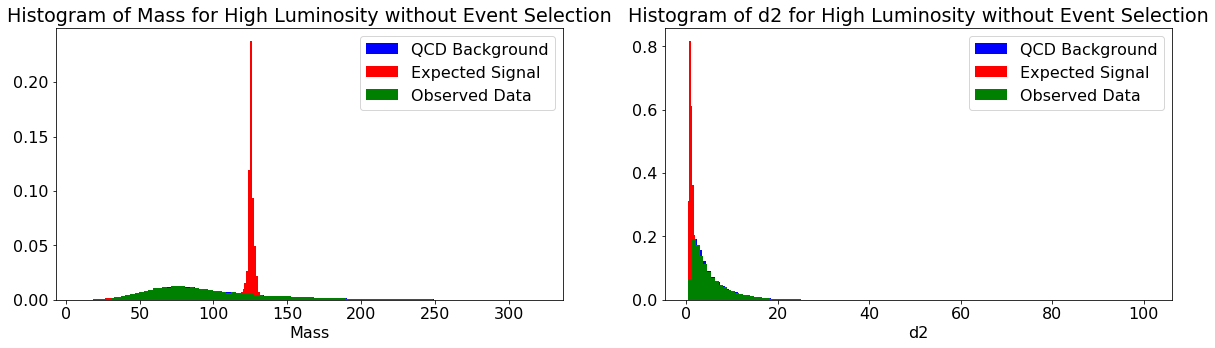

In [23]:
# plotting the data with the expected signal and background without event selection
fig, (ax) = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Histogram of Mass for High Luminosity without Event Selection');
ax[0].hist(qcd_mass,bins=100, label='QCD Background', density=True, color='b');
ax[0].hist(higgs_mass,bins=100, label='Expected Signal', density=True, color='r');
ax[0].hist(mass_high, bins=100,label='Observed Data', density=True, color='g');
ax[0].set_xlabel('Mass');
ax[0].legend();
ax[1].set_title('Histogram of d2 for High Luminosity without Event Selection');
ax[1].hist(qcd['d2'],bins=100, label='QCD Background', density=True, color='b');
ax[1].hist(higgs['d2'],bins=100, label='Expected Signal', density=True, color='r');
ax[1].hist(d2_high, bins=100,label='Observed Data', density=True, color='g');
ax[1].set_xlabel('d2');
ax[1].legend();

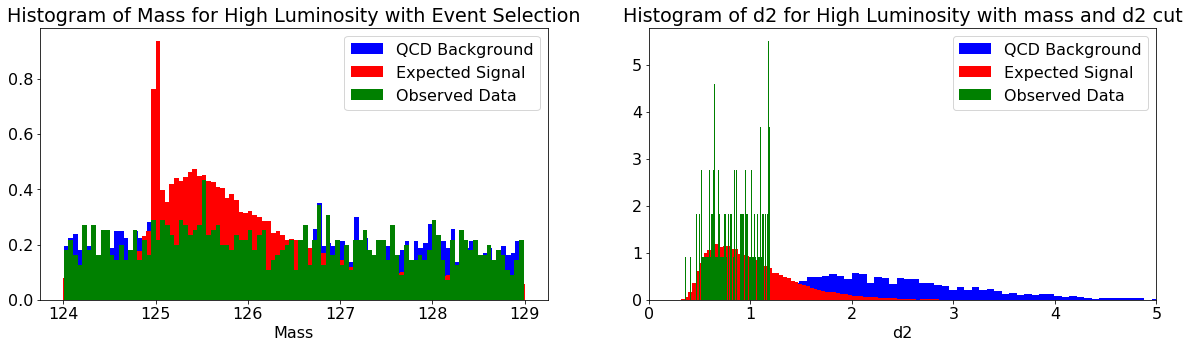

In [32]:
# Plotting the data after doing the featured cuts
fig, (ax) = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Histogram of Mass for High Luminosity with Event Selection');
ax[0].hist(qcd_masscut['mass'],bins=100, label='QCD Background', density=True, color='b');
ax[0].hist(higgs_masscut['mass'],bins=100, label='Expected Signal', density=True, color='r');
ax[0].hist(high_mass['mass'], bins=100,label='Observed Data', density=True, color='g');
ax[0].set_xlabel('Mass');
ax[0].legend();
ax[1].set_title('Histogram of d2 for High Luminosity with mass and d2 cut');
ax[1].hist(qcd_masscut['d2'],bins=100, label='QCD Background', density=True, color='b');
ax[1].hist(higgs_masscut['d2'],bins=100, label='Expected Signal', density=True, color='r');
ax[1].hist(high_d2['d2'], bins=100,label='Observed Data', density=True, color='g');
ax[1].set_xlabel('d2');
ax[1].set_xlim([0,5])
ax[1].legend();

In [96]:
# Evaluate observed significance. Nhiggs 100 Nqcd = 20000 len(higgs) = 100000
# First I need to convert the weight of the simulated data to the observed data by dividing the length of the observed data by the length of the simulated data
# Signal for the observed data is the number of observed data after the mass cut and d2 cut
r = len(highL['mass'])/100000
x = len(qcd_masscut) - (len(qcd_d2[0 > qcd_d2]) + len(qcd_d2[qcd_d2 > 1.2]))
qcd_mu = 20000*r*(x/100000)
signal_highlu_observed = len(high_d2)
print('the average number of qcd background that falls into the selection range is ',qcd_mu)
print('the numbers of observed jets features that falls into the selection range is ',signal_highlu_observed)
p_higgs = stats.poisson.cdf(signal_highlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for high luminosity data is ',sigma_higgs)

the average number of qcd background that falls into the selection range is  8.633616
the numbers of observed jets features that falls into the selection range is  130
The significance for high luminosity data is  inf


The high luminosity data has a significance of inf meaning that it is a value much higher than 5 $\sigma$ so we can easily claim a discovery. This holds because in our expected significance we were expecting a signal of 8.13 after doing the mass cut and d2 cut. Both of these values are higher than the 5 $\sigma$ discovery threshold. 

## Problem 2

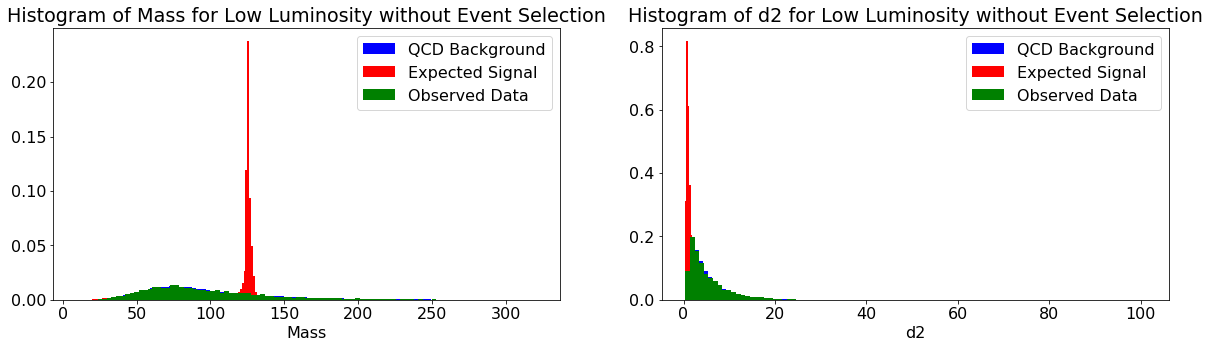

In [34]:
# plotting the data with the expected signal and background without event selection
fig, (ax) = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Histogram of Mass for Low Luminosity without Event Selection');
ax[0].hist(qcd_mass,bins=100, label='QCD Background', density=True, color='b');
ax[0].hist(higgs_mass,bins=100, label='Expected Signal', density=True, color='r');
ax[0].hist(mass_low, bins=100,label='Observed Data', density=True, color='g');
ax[0].set_xlabel('Mass');
ax[0].legend();
ax[1].set_title('Histogram of d2 for Low Luminosity without Event Selection');
ax[1].hist(qcd['d2'],bins=100, label='QCD Background', density=True, color='b');
ax[1].hist(higgs['d2'],bins=100, label='Expected Signal', density=True, color='r');
ax[1].hist(d2_low, bins=100,label='Observed Data', density=True, color='g');
ax[1].set_xlabel('d2');
ax[1].legend();

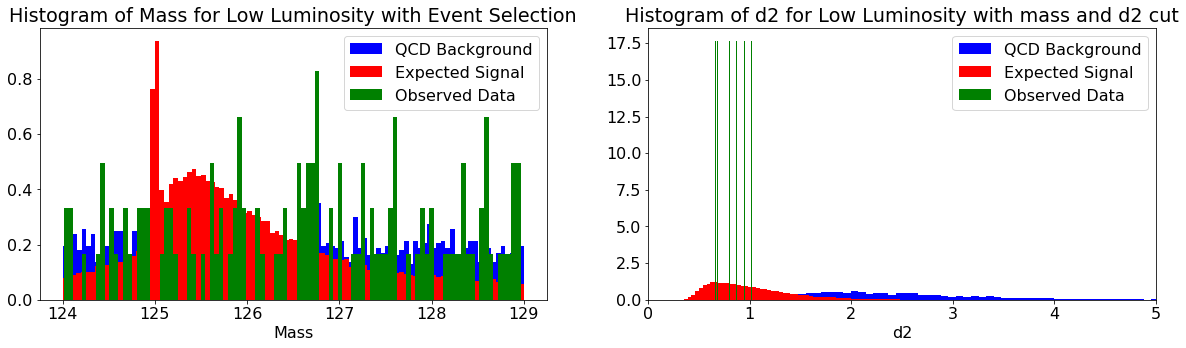

In [35]:
# Plotting the data after doing the featured cuts
fig, (ax) = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Histogram of Mass for Low Luminosity with Event Selection');
ax[0].hist(qcd_masscut['mass'],bins=100, label='QCD Background', density=True, color='b');
ax[0].hist(higgs_masscut['mass'],bins=100, label='Expected Signal', density=True, color='r');
ax[0].hist(low_mass['mass'], bins=100,label='Observed Data', density=True, color='g');
ax[0].set_xlabel('Mass');
ax[0].legend();
ax[1].set_title('Histogram of d2 for Low Luminosity with mass and d2 cut');
ax[1].hist(qcd_masscut['d2'],bins=100, label='QCD Background', density=True, color='b');
ax[1].hist(higgs_masscut['d2'],bins=100, label='Expected Signal', density=True, color='r');
ax[1].hist(low_d2['d2'], bins=100,label='Observed Data', density=True, color='g');
ax[1].set_xlabel('d2');
ax[1].set_xlim([0,5])
ax[1].legend();

In [94]:
# Evaluate observed significance. Nhiggs 100 Nqcd = 20000 len(higgs) = 100000
# First I need to convert the weight of the simulated data to the observed data by dividing the length of the observed data by the length of the simulated data
# Signal for the observed data is the number of observed data after the mass cut and d2 cut
y =  len(lowL['mass'])/100000
x = len(qcd_masscut) - (len(qcd_d2[0 > qcd_d2]) + len(qcd_d2[qcd_d2 > 1.2]))
qcd_mu = 20000*r*(x/100000)
signal_lowlu_observed = len(low_d2)
print('the average number of qcd background that falls into the selection range is ',qcd_mu)
print('the numbers of observed jets features that falls into the selection range is ',signal_lowlu_observed)

p_higgs = stats.poisson.cdf(signal_lowlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for low luminosity data is ',sigma_higgs)

the average number of qcd background that falls into the selection range is  8.633616
the numbers of observed jets features that falls into the selection range is  10
The significance for low luminosity data is  2.9590466657951264


The low luminosity has a significance of 2.96 which falls under the threshold of which we can claim a discovery and is much lower than our expected significance after taking the mass and d2 cuts which was 8.13

## Problem 3

In [107]:
h = len(higgs_masscut) - (len(higgs_d2[0 > higgs_d2]) + len(higgs_d2[higgs_d2 > 1.2]))
signal_expected = 100*r*(h/100000)
p_upperbound_exp = stats.poisson.ppf(0.95, signal_expected)
p_upperbound_obs = stats.poisson.ppf(0.95, signal_lowlu_observed)
print('the expected signal strength is ', signal_expected)
print('the upper bound of 95% confidence interval for observed signal is ',p_upperbound_obs)
print('the upper bound of 95% confidence interval for expected signal is ', p_upperbound_exp)

the expected signal strength is  19.16501376
the upper bound of 95% confidence interval for observed signal is  15.0
the upper bound of 95% confidence interval for expected signal is  27.0


The upper bound 95% confidence interval for the expected is much higher than the observed. This can be attributed to the low luminosity observed data not fitting with our simulated data well. The high luminosity data fits our simulated data. 

In [108]:
p_low = stats.norm.cdf(-1)
p_up = stats.norm.cdf(1)
lowerthreshold = stats.poisson.ppf(p_low, p_upperbound_exp)
upperthreshold = stats.poisson.ppf(p_up, p_upperbound_exp) 
print(lowerthreshold, upperthreshold)

22.0 32.0
